<a href="https://colab.research.google.com/github/kraseliukts/DataAnalysis/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS

**Data Analyst - Tatiana Kraseliuk**

**Objective:** Analyze pricing data to understand the impact of price changes on key business metrics such as ride requests, driver acceptance rates, ride fulfillment, and profitability.

The goal is to provide actionable insights and recommend pricing strategies that improve business performance.

## 1.Data cleaning and preprocessing

#### Data loading

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read and visualize the data file (first and last 5 raws)
url="https://github.com/kraseliukts/DataAnalysis/raw/main/SnappBox.xlsx"

#visualize excel sheet names
data1=pd.ExcelFile(url)
data1.sheet_names

['Distance Bucket',
 'Ride Loss Calculation',
 'Price Monitoring',
 'Price Test',
 'Sheet1',
 'bike qom',
 'bike thr',
 'golestan',
 'Sheet13']

In [ ]:
data=pd.read_excel(url, engine='openpyxl', sheet_name='Distance Bucket')
data.head(5)

City  Service Type Created Date Distance Buckets(KM)  Request  \
0    A           1.0   2022-06-22                  0-1      763   
1    A           1.0   2022-06-22                  1-2     1358   
2    A           1.0   2022-06-22                  2-3     1094   
3    A           1.0   2022-06-22                  3-4      938   
4    A           1.0   2022-06-22                  4-5     1060   

   Offered Requests  Accepted Requests  Ride  Total Ride Fare(GMV)(IRR)  \
0               737                611   507                   53485000   
1              1330               1090   933                  100400000   
2              1062                883   779                  102060000   
3               916                737   628                   89610000   
4              1036                713   609                   95235000   

    Offered-Order / Created-Order %  Accepted-Order / Offered-Order%  \
0                          0.965924                         0.829037   
1                          0.979381                         0.819549   
2                          0.970750                         0.831450   
3                          0.976546                         0.804585   
4                          0.977358                         0.688224   

   Fullfillment Rate%  Average Ride Fare  
0            0.664482        105493.0966  
1            0.687040        107609.8607  
2            0.712066        131014.1207  
3            0.669510        142691.0828  
4            0.574528        156379.3103

In [ ]:
data.tail(5)

City  Service Type Created Date Distance Buckets(KM)  Request  \
30            A           1.0   2022-06-22                32-33        3   
31            A           1.0   2022-06-22                33-34        4   
32            A           1.0   2022-06-22                34-35        3   
33            A           1.0   2022-06-22                 >=35        6   
34  Grand Total           NaN          NaT                  NaN    14307   

    Offered Requests  Accepted Requests  Ride  Total Ride Fare(GMV)(IRR)  \
30                 3                  2     2                    1255000   
31                 4                  4     1                     565000   
32                 3                  2     1                     445000   
33                 6                  5     2                     945000   
34             13816               9192  7613                 1301710000   

     Offered-Order / Created-Order %  Accepted-Order / Offered-Order%  \
30                          1.000000                         0.666667   
31                          1.000000                         1.000000   
32                          1.000000                         0.666667   
33                          1.000000                         0.833333   
34                          0.965681                         0.665316   

    Fullfillment Rate%  Average Ride Fare  
30            0.666667         627500.000  
31            0.250000         565000.000  
32            0.333333         445000.000  
33            0.333333         472500.000  
34            0.532117         170985.157

In [ ]:
#review the data information and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   City                              35 non-null     object        
 1   Service Type                      34 non-null     float64       
 2   Created Date                      34 non-null     datetime64[ns]
 3   Distance Buckets(KM)              34 non-null     object        
 4   Request                           35 non-null     int64         
 5   Offered Requests                  35 non-null     int64         
 6   Accepted Requests                 35 non-null     int64         
 7   Ride                              35 non-null     int64         
 8   Total Ride Fare(GMV)(IRR)         35 non-null     int64         
 9    Offered-Order / Created-Order %  35 non-null     float64       
 10  Accepted-Order / Offered-Order%   35 non-null     fl

### Data cleaning

#### Missing values

In [ ]:
# verify if there are missing values
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

City - 0%
Service Type - 3%
Created Date - 3%
Distance Buckets(KM) - 3%
Request - 0%
Offered Requests - 0%
Accepted Requests - 0%
Ride - 0%
Total Ride Fare(GMV)(IRR) - 0%
 Offered-Order / Created-Order % - 0%
Accepted-Order / Offered-Order% - 0%
Fullfillment Rate% - 0%
Average Ride Fare - 0%


In [ ]:
data.isnull().sum()

City                                0
Service Type                        1
Created Date                        1
Distance Buckets(KM)                1
Request                             0
Offered Requests                    0
Accepted Requests                   0
Ride                                0
Total Ride Fare(GMV)(IRR)           0
 Offered-Order / Created-Order %    0
Accepted-Order / Offered-Order%     0
Fullfillment Rate%                  0
Average Ride Fare                   0
dtype: int64

In [ ]:
#Count how much there are missing values per row and visualize only the raws with missing values
missing_values=data.isnull().sum(axis=1)
raw_na = data[missing_values > 1]
raw_na

City  Service Type Created Date Distance Buckets(KM)  Request  \
34  Grand Total           NaN          NaT                  NaN    14307   

    Offered Requests  Accepted Requests  Ride  Total Ride Fare(GMV)(IRR)  \
34             13816               9192  7613                 1301710000   

     Offered-Order / Created-Order %  Accepted-Order / Offered-Order%  \
34                          0.965681                         0.665316   

    Fullfillment Rate%  Average Ride Fare  
34            0.532117         170985.157

In [ ]:
# the raw with index #34 will be deleted, as it shows the total values
data=data.drop(34)
data.tail()

City  Service Type Created Date Distance Buckets(KM)  Request  \
29    A           1.0   2022-06-22                31-32        2   
30    A           1.0   2022-06-22                32-33        3   
31    A           1.0   2022-06-22                33-34        4   
32    A           1.0   2022-06-22                34-35        3   
33    A           1.0   2022-06-22                 >=35        6   

    Offered Requests  Accepted Requests  Ride  Total Ride Fare(GMV)(IRR)  \
29                 2                  2     1                     300000   
30                 3                  2     2                    1255000   
31                 4                  4     1                     565000   
32                 3                  2     1                     445000   
33                 6                  5     2                     945000   

     Offered-Order / Created-Order %  Accepted-Order / Offered-Order%  \
29                               1.0                         1.000000   
30                               1.0                         0.666667   
31                               1.0                         1.000000   
32                               1.0                         0.666667   
33                               1.0                         0.833333   

    Fullfillment Rate%  Average Ride Fare  
29            0.500000           300000.0  
30            0.666667           627500.0  
31            0.250000           565000.0  
32            0.333333           445000.0  
33            0.333333           472500.0

In [ ]:
# verify if there are missing values after its treatment.There are no missing values.
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

City - 0%
Service Type - 0%
Created Date - 0%
Distance Buckets(KM) - 0%
Request - 0%
Offered Requests - 0%
Accepted Requests - 0%
Ride - 0%
Total Ride Fare(GMV)(IRR) - 0%
 Offered-Order / Created-Order % - 0%
Accepted-Order / Offered-Order% - 0%
Fullfillment Rate% - 0%
Average Ride Fare - 0%


#### Duplicated values

In [ ]:
#verify if there are duplicated values. There are no duplicated values.
data_dup = data.drop_duplicates()
print(data_dup.shape)
print(data.shape)

(34, 13)
(34, 13)


### Data consistency

In [ ]:
#convert the date type of the column "Service type" to Int
#convert the date tyre of the column "City" to String
#convert the date tyre of the column "Total Ride Fare(GMV)(IRR)" to Float with 2 decimales
data["Service Type"]=data["Service Type"].astype(int)
data["City"]=data["City"].astype("string")
data["Total Ride Fare(GMV)(IRR)"]=data["Total Ride Fare(GMV)(IRR)"].astype(float)

In [ ]:
#round values to 2 decimals
columns_round=["Average Ride Fare","Total Ride Fare(GMV)(IRR)" ]
data[columns_round].round(2).head(2)

Average Ride Fare  Total Ride Fare(GMV)(IRR)
0          105493.10                 53485000.0
1          107609.86                100400000.0

### Outliers handling

In [ ]:
#define numeric columns for analysis. We will analyze the columns "columns_num".
numeric_cols = data.select_dtypes(include='number').columns
columns_num=['Request', 'Offered Requests', 'Accepted Requests', 'Ride', 'Total Ride Fare(GMV)(IRR)','Average Ride Fare']

In [ ]:
# revies statistical information od the data
data.describe()

Service Type         Created Date      Request  Offered Requests  \
count          34.0                   34    34.000000         34.000000   
mean            1.0  2022-06-22 00:00:00   420.735294        406.294118   
min             1.0  2022-06-22 00:00:00     2.000000          2.000000   
25%             1.0  2022-06-22 00:00:00    11.000000         10.000000   
50%             1.0  2022-06-22 00:00:00   152.000000        142.500000   
75%             1.0  2022-06-22 00:00:00   897.750000        870.500000   
max             1.0  2022-06-22 00:00:00  1358.000000       1330.000000   
std             0.0                  NaN   470.853275        458.983563   

       Accepted Requests        Ride  Total Ride Fare(GMV)(IRR)  \
count          34.000000   34.000000               3.400000e+01   
mean          270.352941  223.911765               3.828559e+07   
min             2.000000    1.000000               3.000000e+05   
25%             5.250000    4.250000               1.403750e+06   
50%            69.500000   53.000000               1.510750e+07   
75%           589.000000  473.500000               8.230375e+07   
max          1090.000000  933.000000               1.127250e+08   
std           331.082237  282.116607               4.213199e+07   

        Offered-Order / Created-Order %  Accepted-Order / Offered-Order%  \
count                         34.000000                        34.000000   
mean                           0.944085                         0.659208   
min                            0.714286                         0.361111   
25%                            0.934615                         0.534836   
50%                            0.967955                         0.649490   
75%                            0.995470                         0.803439   
max                            1.000000                         1.000000   
std                            0.072664                         0.172333   

       Fullfillment Rate%  Average Ride Fare  
count           34.000000          34.000000  
mean             0.448408      300504.129465  
min              0.250000      105493.096600  
25%              0.353992      199362.490525  
50%              0.403346      284959.045550  
75%              0.540164      352500.000000  
max              0.712066      647500.000000  
std              0.129577      138567.509402

Review outliers using 3 different tecniques - IQR, Z-score and box plot.

#### Interquartile range (IQR)

In [ ]:
# define the function to identify oitliers
def find_outliers_IQR(data):

   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
   return outliers

In [ ]:
outliers = find_outliers_IQR(data[columns_num])

print("max outlier value: "+ str(outliers.max()))
print("________________________________________")
print("min outlier value: "+ str(outliers.min()))


max outlier value: Request                           NaN
Offered Requests                  NaN
Accepted Requests                 NaN
Ride                              NaN
Total Ride Fare(GMV)(IRR)         NaN
Average Ride Fare            647500.0
dtype: float64
________________________________________
min outlier value: Request                           NaN
Offered Requests                  NaN
Accepted Requests                 NaN
Ride                              NaN
Total Ride Fare(GMV)(IRR)         NaN
Average Ride Fare            627500.0
dtype: float64


After calculating the IQR we can appreciate that in the data there are outliers only in "Average ride fare" column.

#### Z-score

In [ ]:
#Calculate Z-score and visualize only raws with the values above 2, using zcore module
from scipy.stats import zscore

z_score_result=data[columns_num].apply(zscore)
z_score_result=z_score_result[abs(z_score_result)>2]
raws = z_score_result[abs(z_score_result).gt(2).any(axis=1)]
raws


Request  Offered Requests  Accepted Requests      Ride  \
1   2.020501          2.042768            2.51289  2.551256   
28       NaN               NaN                NaN       NaN   
30       NaN               NaN                NaN       NaN   

    Total Ride Fare(GMV)(IRR)  Average Ride Fare  
1                         NaN                NaN  
28                        NaN           2.541823  
30                        NaN           2.395319

In [ ]:
# visualize the 3 raws with outliers values
data.loc[[1, 28, 30]]

City  Service Type Created Date Distance Buckets(KM)  Request  \
1     A             1   2022-06-22                  1-2     1358   
28    A             1   2022-06-22                30-31        4   
30    A             1   2022-06-22                32-33        3   

    Offered Requests  Accepted Requests  Ride  Total Ride Fare(GMV)(IRR)  \
1               1330               1090   933                100400000.0   
28                 3                  2     2                  1295000.0   
30                 3                  2     2                  1255000.0   

     Offered-Order / Created-Order %  Accepted-Order / Offered-Order%  \
1                           0.979381                         0.819549   
28                          0.750000                         0.666667   
30                          1.000000                         0.666667   

    Fullfillment Rate%  Average Ride Fare  
1             0.687040        107609.8607  
28            0.500000        647500.0000  
30            0.666667        627500.0000

In [ ]:
#Calculate Z-score using stats module and numpy
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data[columns_num]))
z.head(5)

Request  Offered Requests  Accepted Requests      Ride  \
0  0.737835          0.731353           1.044362  1.018534   
1  2.020501          2.042768           2.512890  2.551256   
2  1.451385          1.450088           1.878265  1.997174   
3  1.115090          1.127210           1.430656  1.453885   
4  1.378090          1.392589           1.357076  1.385524   

   Total Ride Fare(GMV)(IRR)  Average Ride Fare  
0                   0.366182           1.428500  
1                   1.496452           1.412994  
2                   1.536445           1.241553  
3                   1.236501           1.156016  
4                   1.372018           1.055747

After calculating the Z-score we can appreciate that in the date there are outliers in "Average ride fare" column. Values in the first row are not outliers, because for this km buckets there are more rides (the highest values) comparing with the rest of the data.

#### Box plot

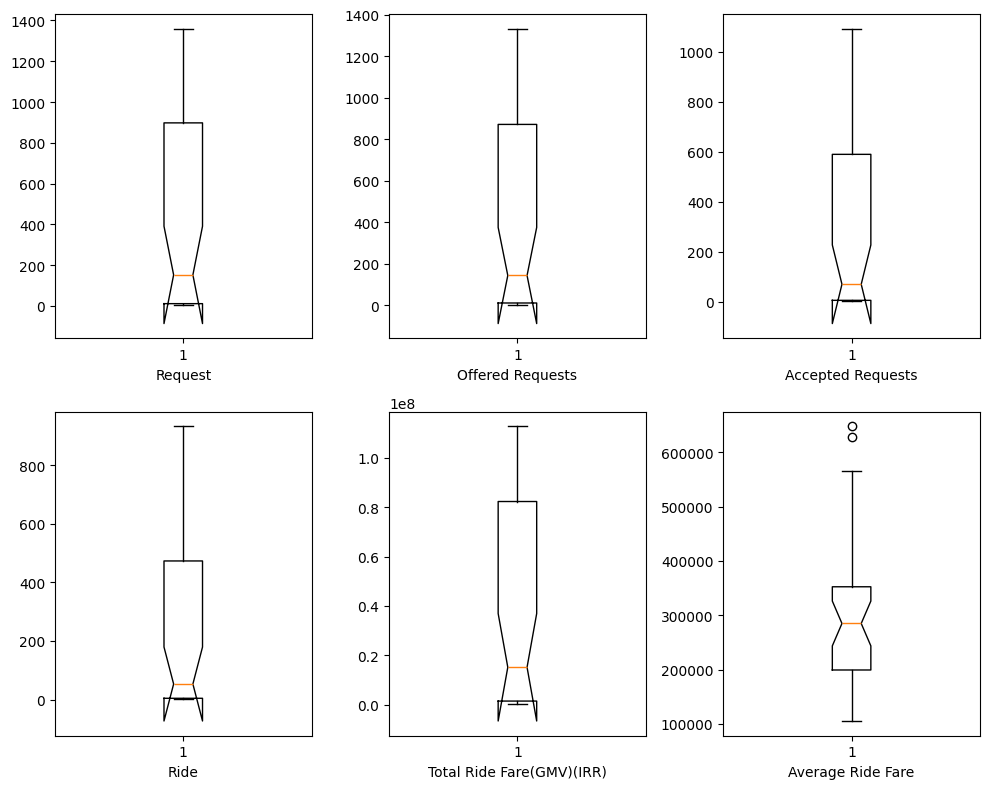

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))

axes = axes.flatten()

for ax, column in zip(axes, columns_num):
    ax.boxplot(x=column, data=data, notch=True)
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

In accordance with the box plot, only the column "Averade ride fare" has the outliers.

Finally, there are 2 rows with outliers values (column - Average Ride Fare). Will proceed deleting rows with outliers values.

In [ ]:
data_clean = data.drop([data.index[28], data.index[30]])
print("Original DataFrame Shape:", data.shape)
print("DataFrame Shape after Removing Outliers:", data_clean.shape)

Original DataFrame Shape: (34, 13)
DataFrame Shape after Removing Outliers: (32, 13)


In [ ]:
data=data_clean

In [ ]:
data.describe()

Service Type         Created Date      Request  Offered Requests  \
count          32.0                   32    32.000000          32.00000   
mean            1.0  2022-06-22 00:00:00   446.812500         431.50000   
min             1.0  2022-06-22 00:00:00     2.000000           2.00000   
25%             1.0  2022-06-22 00:00:00    14.000000          13.00000   
50%             1.0  2022-06-22 00:00:00   209.500000         197.50000   
75%             1.0  2022-06-22 00:00:00   938.500000         911.50000   
max             1.0  2022-06-22 00:00:00  1358.000000        1330.00000   
std             0.0                  NaN   473.363424         461.63636   

       Accepted Requests        Ride  Total Ride Fare(GMV)(IRR)  \
count          32.000000   32.000000               3.200000e+01   
mean          287.125000  237.781250               4.059875e+07   
min             2.000000    1.000000               3.000000e+05   
25%             6.750000    5.000000               2.161250e+06   
50%           101.500000   76.500000               2.113500e+07   
75%           611.500000  496.500000               8.727750e+07   
max          1090.000000  933.000000               1.127250e+08   
std           334.291813  285.217374               4.237607e+07   

        Offered-Order / Created-Order %  Accepted-Order / Offered-Order%  \
count                         32.000000                        32.000000   
mean                           0.948403                         0.658742   
min                            0.714286                         0.361111   
25%                            0.937179                         0.532592   
50%                            0.967955                         0.615528   
75%                            0.986411                         0.808326   
max                            1.000000                         1.000000   
std                            0.065463                         0.177794   

       Fullfillment Rate%  Average Ride Fare  
count           32.000000          32.000000  
mean             0.439975      279441.887556  
min              0.250000      105493.096600  
25%              0.348039      193911.755475  
50%              0.400000      274639.180250  
75%              0.529895      336562.500000  
max              0.712066      565000.000000  
std              0.127190      112465.520628

### Data transformation

In [ ]:
#create column fullfilment rate
data['fulfillment_rate']=data['Ride'] / data['Request'] * 100
data['fulfillment_rate']=data['fulfillment_rate'].round(2)

In [ ]:
#create column acceptance rate
data['acceptance_rate']=data['Accepted Requests'] / data['Offered Requests'] * 100
data['acceptance_rate']=data['acceptance_rate'].round(2)

In [ ]:
#create new columns: Year, Month, Day, Week.
data['Created Date'] = pd.to_datetime(data['Created Date']).dt.date
data['Created Date'] = pd.to_datetime(data['Created Date'], format='%Y/%m/%d')

In [ ]:
data["Year"]=data['Created Date'].dt.year
data["Month"]=data['Created Date'].dt.month
data["Day"]=data['Created Date'].dt.day
data["Week"]=data['Created Date'].dt.strftime("%w")
data["Week"]=data['Created Date'].dt.strftime("%w").astype(int)

In [ ]:
#convert the values of Offered-Order / Created-Order % in % format with 2 decimals
data[' Offered-Order / Created-Order %']=(data[' Offered-Order / Created-Order %'] * 100).round(2)

In [ ]:
#delete the columns 'Accepted-Order / Offered-Order%', 'Fullfillment Rate%' that are the same than the 2 new created columns
data=data.drop(['Accepted-Order / Offered-Order%', 'Fullfillment Rate%'], axis=1)

In [ ]:
#delete special simbols from the column 'Distance Buckets(KM)'
data['Distance Buckets(KM)']=data['Distance Buckets(KM)'].str.replace(r">=", "", regex=True)

In [ ]:
#create columns with the First and Last km of Distance Buckets
data[['1st', '2nd']]=data['Distance Buckets(KM)'].str.split(r'[-]', expand=True)
data['1st']=data['1st'].astype(float)
data['2nd']=data['2nd'].astype(float)

In [ ]:
# define ranges for distance in km
data['Km_group'] = pd.cut(data['1st'], bins=range(0, 45, 5), right=False, labels=[f'{i}-{i+5}' for i in range(0, 40, 5)])

In [ ]:
data.head(7)

City  Service Type Created Date Distance Buckets(KM)  Request  \
0    A             1   2022-06-22                  0-1      763   
1    A             1   2022-06-22                  1-2     1358   
2    A             1   2022-06-22                  2-3     1094   
3    A             1   2022-06-22                  3-4      938   
4    A             1   2022-06-22                  4-5     1060   
5    A             1   2022-06-22                  5-6     1091   
6    A             1   2022-06-22                  6-7     1159   

   Offered Requests  Accepted Requests  Ride  Total Ride Fare(GMV)(IRR)  \
0               737                611   507                 53485000.0   
1              1330               1090   933                100400000.0   
2              1062                883   779                102060000.0   
3               916                737   628                 89610000.0   
4              1036                713   609                 95235000.0   
5              1058                716   605                101310000.0   
6              1138                750   632                111610000.0   

    Offered-Order / Created-Order %  Average Ride Fare  fulfillment_rate  \
0                             96.59        105493.0966             66.45   
1                             97.94        107609.8607             68.70   
2                             97.07        131014.1207             71.21   
3                             97.65        142691.0828             66.95   
4                             97.74        156379.3103             57.45   
5                             96.98        167454.5455             55.45   
6                             98.19        176598.1013             54.53   

   acceptance_rate  Year  Month  Day  Week  1st  2nd Km_group  
0            82.90  2022      6   22     3  0.0  1.0      0-5  
1            81.95  2022      6   22     3  1.0  2.0      0-5  
2            83.15  2022      6   22     3  2.0  3.0      0-5  
3            80.46  2022      6   22     3  3.0  4.0      0-5  
4            68.82  2022      6   22     3  4.0  5.0      0-5  
5            67.67  2022      6   22     3  5.0  6.0     5-10  
6            65.91  2022      6   22     3  6.0  7.0     5-10

Data aggregation

In [ ]:
#create new dataset grouped by distance buckets (km), city, service type, calculating all rates
data_grouped = data.groupby(['Km_group', 'City', 'Service Type', 'Created Date'])[['Request', 'Offered Requests', 'Accepted Requests', 'Ride', 'Total Ride Fare(GMV)(IRR)']].sum().reset_index()

data_grouped['Fulfillment_rate']=(data_grouped['Ride'] / data_grouped['Request'] * 100).round(2)

data_grouped['Acceptance_rate']=(data_grouped['Accepted Requests'] / data_grouped['Offered Requests'] * 100).round(2)

data_grouped['Offered-Order / Created-Order %']=(data_grouped['Offered Requests'] / data_grouped['Request'] * 100).round(2)

data_grouped['Average_Ride_Fare']=(data_grouped['Total Ride Fare(GMV)(IRR)'] / data_grouped['Ride']).round(2)

<ipython-input-95-3cb279c1c10b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_grouped = data.groupby(['Km_group', 'City', 'Service Type', 'Created Date'])[['Request', 'Offered Requests', 'Accepted Requests', 'Ride', 'Total Ride Fare(GMV)(IRR)']].sum().reset_index()


### Final dataset

In [ ]:
data_grouped

Km_group City  Service Type Created Date  Request  Offered Requests  \
0      0-5    A             1   2022-06-22     5213              5081   
1     5-10    A             1   2022-06-22     5416              5265   
2    10-15    A             1   2022-06-22     2790              2646   
3    15-20    A             1   2022-06-22      722               669   
4    20-25    A             1   2022-06-22      123               114   
5    25-30    A             1   2022-06-22       19                18   
6    30-35    A             1   2022-06-22        9                 9   
7    35-40    A             1   2022-06-22        6                 6   

   Accepted Requests  Ride  Total Ride Fare(GMV)(IRR)  Fulfillment_rate  \
0               4034  3456                440790000.0             66.30   
1               3320  2749                508940000.0             50.76   
2               1406  1093                256245000.0             39.18   
3                341   254                 71995000.0             35.18   
4                 62    44                 16215000.0             35.77   
5                 12     8                  2720000.0             42.11   
6                  8     3                  1310000.0             33.33   
7                  5     2                   945000.0             33.33   

   Acceptance_rate  Offered-Order / Created-Order %  Average_Ride_Fare  
0            79.39                            97.47          127543.40  
1            63.06                            97.21          185136.41  
2            53.14                            94.84          234441.90  
3            50.97                            92.66          283444.88  
4            54.39                            92.68          368522.73  
5            66.67                            94.74          340000.00  
6            88.89                           100.00          436666.67  
7            83.33                           100.00          472500.00

## 2.EDA (Exploratory Data Analysis).

In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6431114d99d1c186ab38ed5e9774c09885e9d147db791c0db3f0886b3761702a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


### Profile report

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile=ProfileReport(data_grouped, title='Profile report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Pair plot

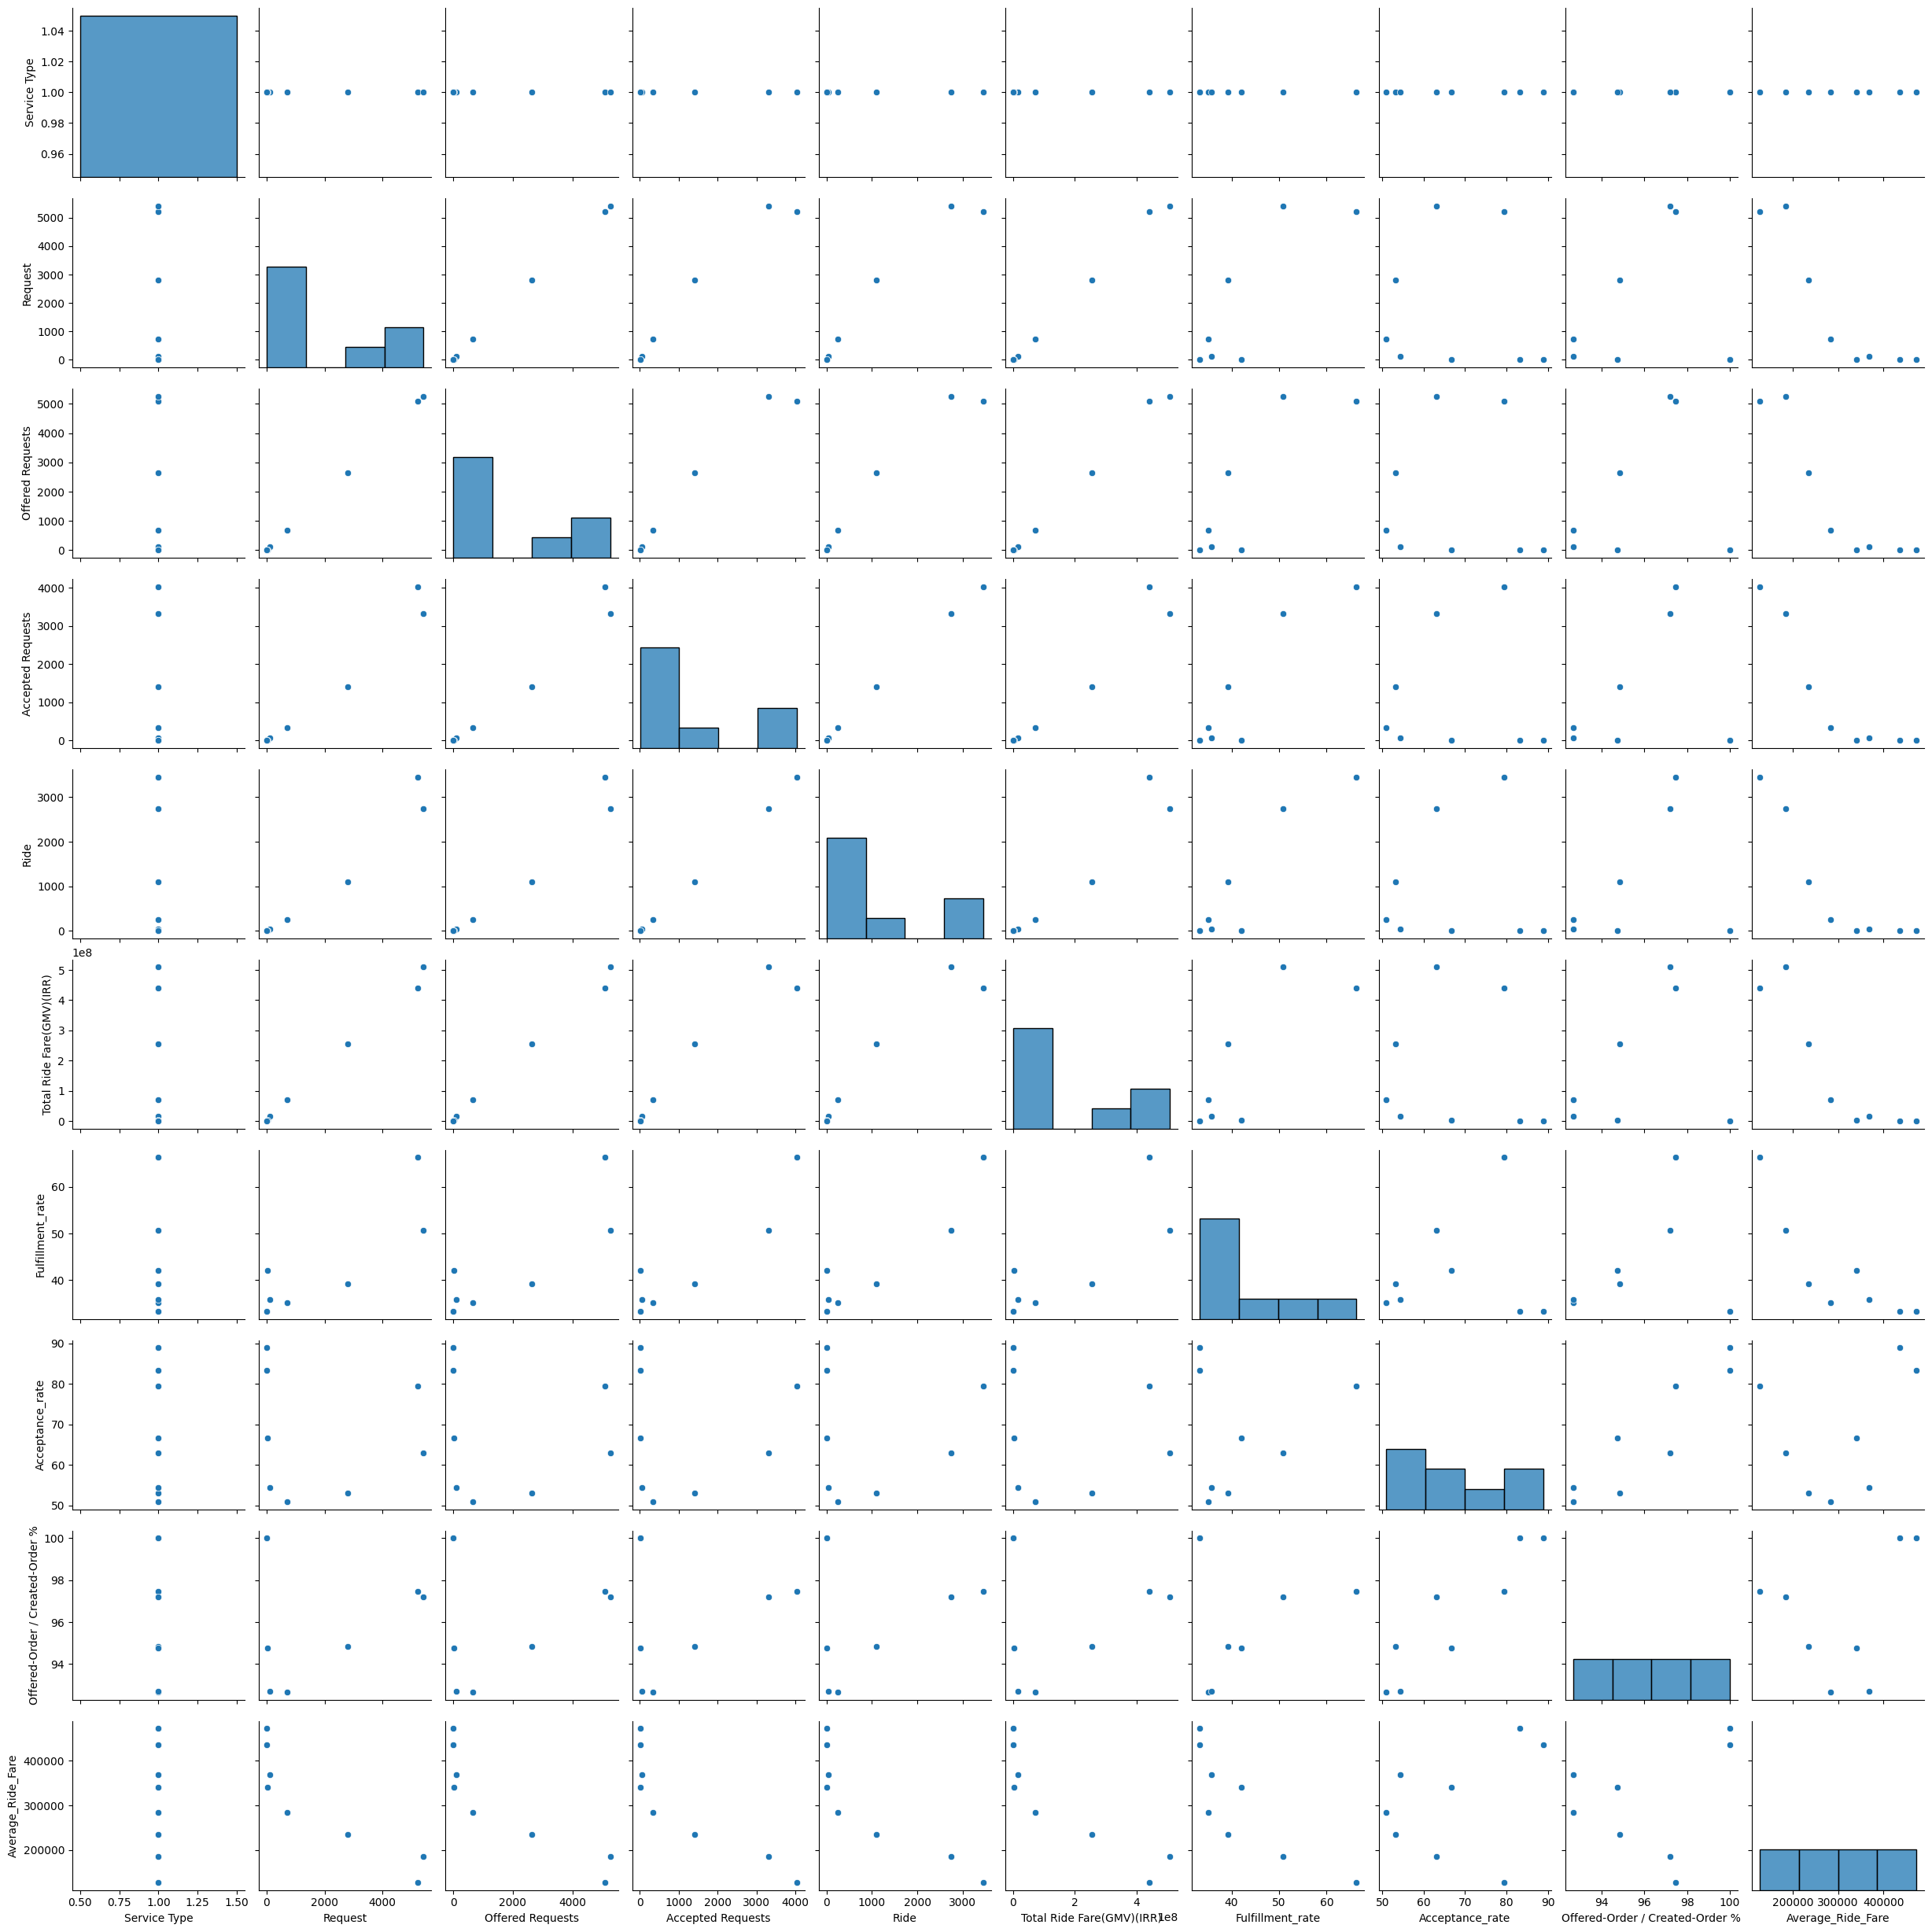

In [ ]:
sns.pairplot(data_grouped)

### Heat map (correlation matrix)

<Axes: >

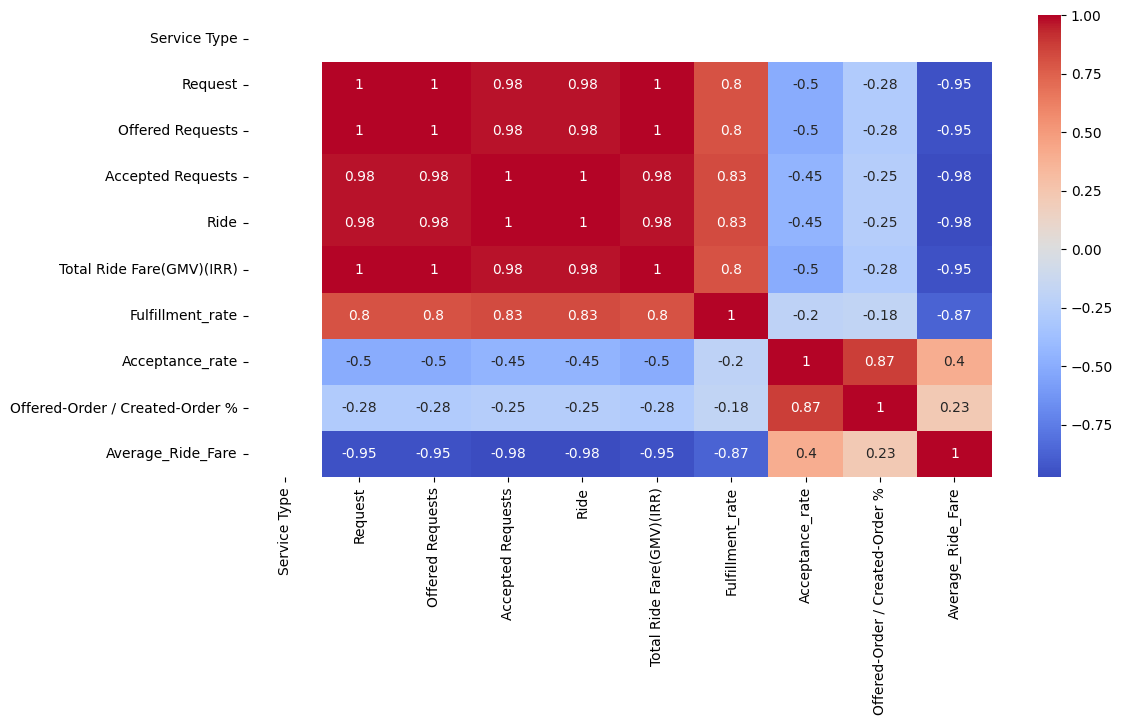

In [ ]:
#correlation matrix

plt.figure(figsize=(12, 6))

corr = data_grouped.corr(method='spearman', numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

As we can appreciate, the correlation between all variables is high.

### Visualizations

Visualize scatter plots for some variables.

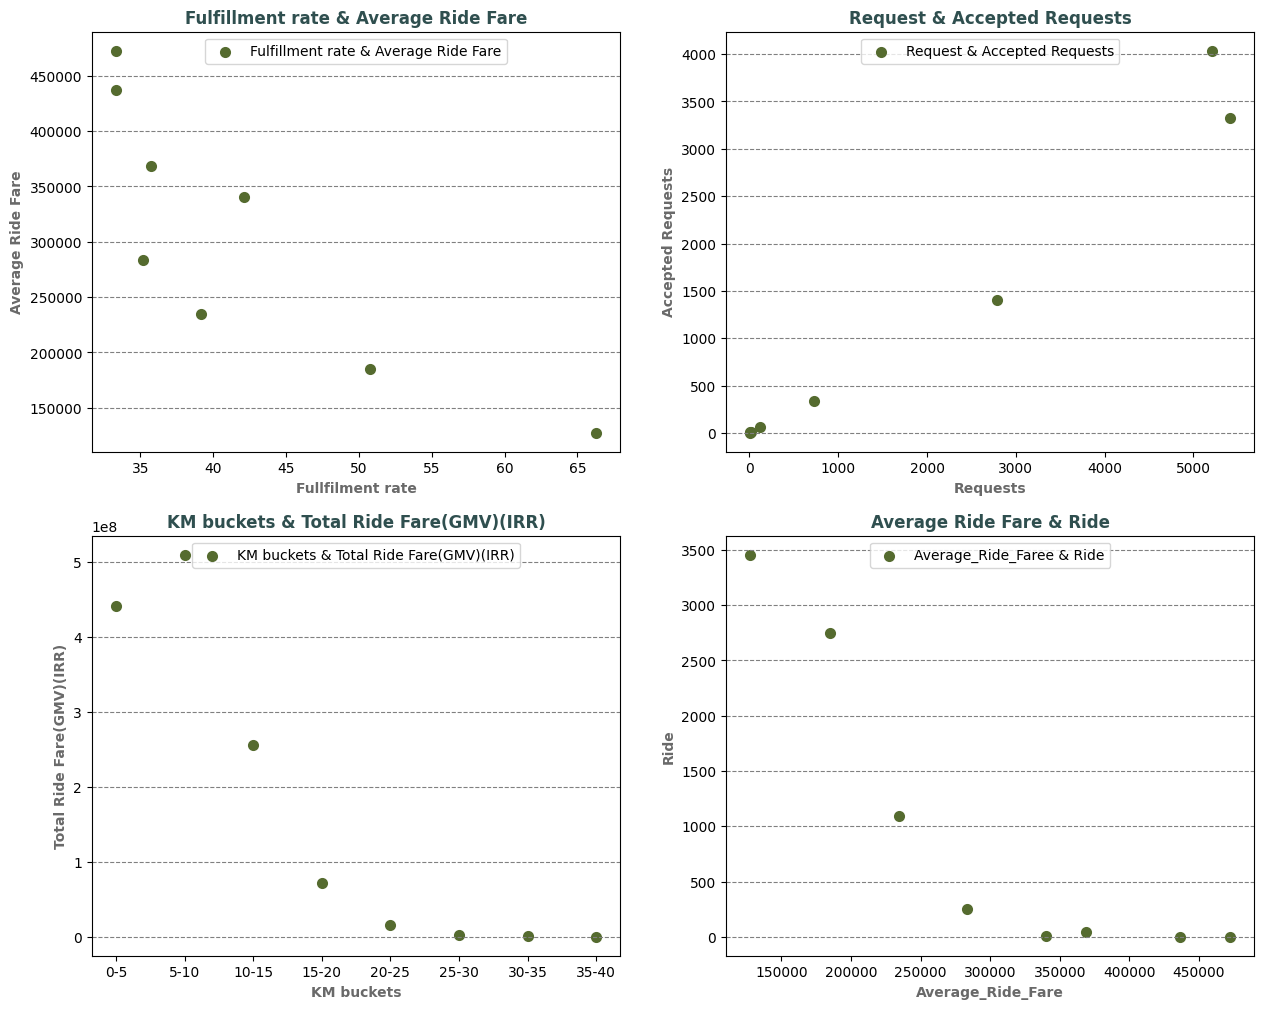

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

axes[0,0].scatter(data_grouped['Fulfillment_rate'],data_grouped['Average_Ride_Fare'], color = "darkolivegreen", linewidth = 2, label='Fulfillment rate & Average Ride Fare')
axes[0,1].scatter(data_grouped['Request'],data_grouped['Accepted Requests'], color = "darkolivegreen", linewidth = 2, label='Request & Accepted Requests')
axes[1,0].scatter(data_grouped['Km_group'],data_grouped['Total Ride Fare(GMV)(IRR)'], color = "darkolivegreen", linewidth = 2, label='KM buckets & Total Ride Fare(GMV)(IRR)')
axes[1,1].scatter(data_grouped['Average_Ride_Fare'],data_grouped['Ride'], color = "darkolivegreen", linewidth = 2, label='Average_Ride_Faree & Ride')

axes[0,0].set_title('Fulfillment rate & Average Ride Fare', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[0,0].set_xlabel("Fullfilment rate", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0,0].set_ylabel("Average Ride Fare", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0,0].legend(prop={'size': 10}, loc = 'upper center')
axes[0,0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axes[0,1].set_title('Request & Accepted Requests', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[0,1].set_xlabel("Requests", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0,1].set_ylabel("Accepted Requests", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0,1].legend(prop={'size': 10}, loc = 'upper center')
axes[0,1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axes[1,0].set_title('KM buckets & Total Ride Fare(GMV)(IRR)', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[1,0].set_xlabel("KM buckets", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1,0].set_ylabel("Total Ride Fare(GMV)(IRR)", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1,0].legend(prop={'size': 10}, loc = 'upper center')
axes[1,0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axes[1,1].set_title('Average Ride Fare & Ride', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[1,1].set_xlabel("Average_Ride_Fare", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1,1].set_ylabel("Ride", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1,1].legend(prop={'size': 10}, loc = 'upper center')
axes[1,1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')



Visualize line plots for some variables.

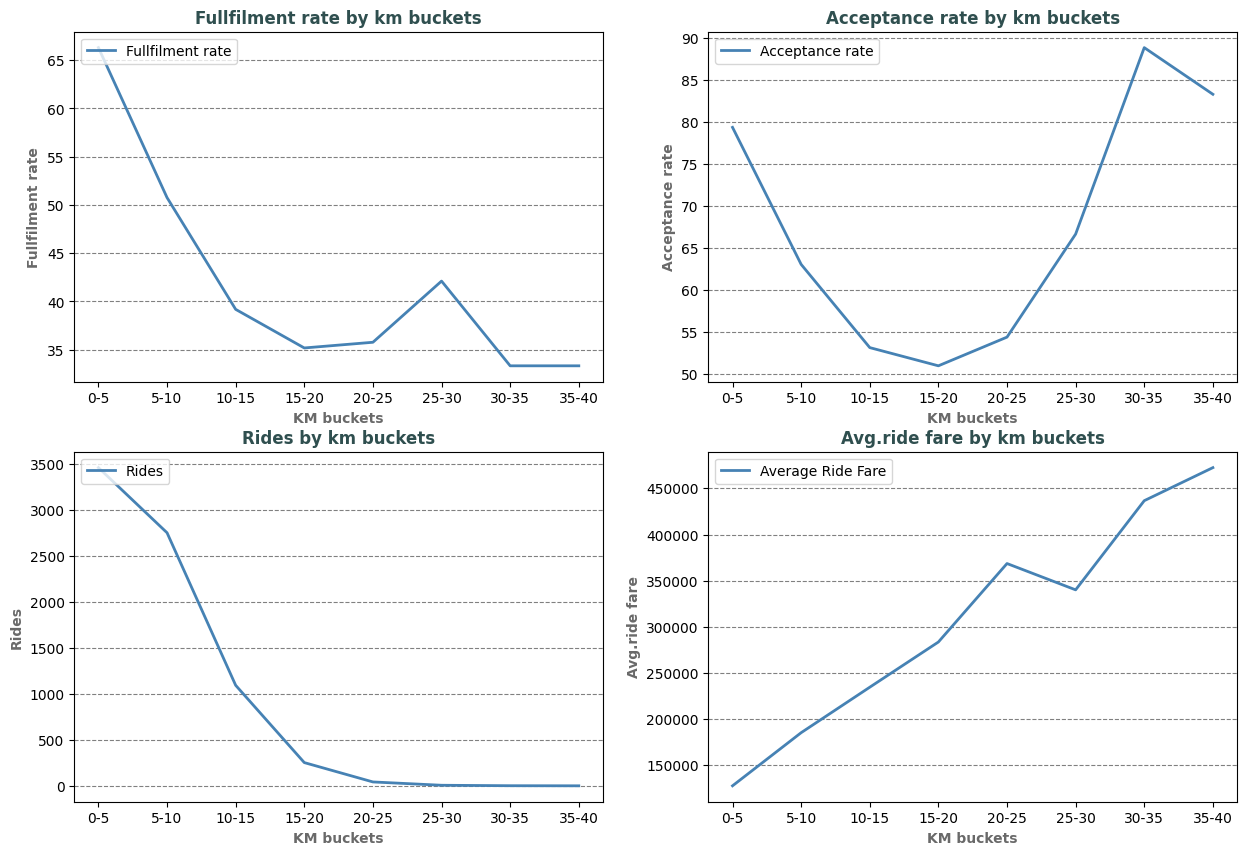

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes[0,0].plot(data_grouped['Km_group'],data_grouped['Fulfillment_rate'], color = "steelblue", linewidth = 2, label='Fullfilment rate')
axes[0,1].plot(data_grouped['Km_group'],data_grouped['Acceptance_rate'], color = "steelblue", linewidth = 2, label='Acceptance rate')
axes[1,0].plot(data_grouped['Km_group'],data_grouped['Ride'], color = "steelblue", linewidth = 2, label='Rides')
axes[1,1].plot(data_grouped['Km_group'],data_grouped['Average_Ride_Fare'], color = "steelblue", linewidth = 2, label='Average Ride Fare')

axes[0,0].set_title('Fullfilment rate by km buckets', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[0,0].set_xlabel("KM buckets", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0,0].set_ylabel("Fullfilment rate", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0,0].legend(prop={'size': 10}, loc = 'upper left')
axes[0,0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axes[0,1].set_title('Acceptance rate by km buckets', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[0,1].set_xlabel("KM buckets", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0,1].set_ylabel("Acceptance rate", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0,1].legend(prop={'size': 10}, loc = 'upper left')
axes[0,1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axes[1,0].set_title('Rides by km buckets', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[1,0].set_xlabel("KM buckets", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1,0].set_ylabel("Rides", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1,0].legend(prop={'size': 10}, loc = 'upper left')
axes[1,0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axes[1,1].set_title('Avg.ride fare by km buckets', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[1,1].set_xlabel("KM buckets", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1,1].set_ylabel("Avg.ride fare", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1,1].legend(prop={'size': 10}, loc = 'upper left')
axes[1,1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

plt.xticks(rotation=0)
plt.show()

Conclusions:

1. As we can see, the fulfillment rate is decreasing with greater km buckets (the higher value is for 0-5 km buckets), and acceptance rate has its lower value in 15-20 km and the higher value - 30-35 km bucket.

2. There are more rides for short distance than for large distances. So, the total ride fare descreases for large distances.

3. Average ride fare increases with increase of km buckets - price depends on the distance. Fulfillment rate is higher for lower avg. ride fare.

More people use the service for short distances (with low avg. ride fare) and fulfillment rate for short distances is higher. The price for each ride depends on the distance.

## 3.Impact of price changes

### Price elasticity of demand (PED)

Price elasticity of demand (PED) is a measure used in economics to show the responsiveness, or elasticity, of the quantity demanded of a good or service to a change in its price when nothing but the price changes. More precisely, it gives the percentage change in quantity demanded in response to a one percent change in price.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols("Ride ~ Average_Ride_Fare", data=data_grouped).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Ride   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     19.93
Date:                Fri, 01 Nov 2024   Prob (F-statistic):            0.00426
Time:                        18:53:29   Log-Likelihood:                -62.860
No. Observations:                   8   AIC:                             129.7
Df Residuals:                       6   BIC:                             129.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4041.4216    737.84

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


Conclusion:

1. The p-value is too small, so we can reject the null hipotesis that the price has no effect on rides quantity.
2. The r-squared is high (0.769), so we can appreciate that the two variables have the strong relationship.

In [ ]:
#calculate the Price Elasticity of demand, creating the new column
data_grouped['Price_Elasticity_of_Demand']=data_grouped.Ride.pct_change() / data_grouped.Average_Ride_Fare.pct_change()
data_grouped[['Km_group','Price_Elasticity_of_Demand']]

Km_group  Price_Elasticity_of_Demand
0      0-5                         NaN
1     5-10                   -0.453037
2    10-15                   -2.261946
3    15-20                   -3.672439
4    20-25                   -2.754468
5    25-30                   10.571169
6    30-35                   -2.198276
7    35-40                   -4.062016

The price elasticity of demand is greater than 1, so it is elastic - the quantity demanded is very sensitive to price. Let´s visualize it.

As we can see, the price is lower when we have a greater quantity of rides and vice verse.

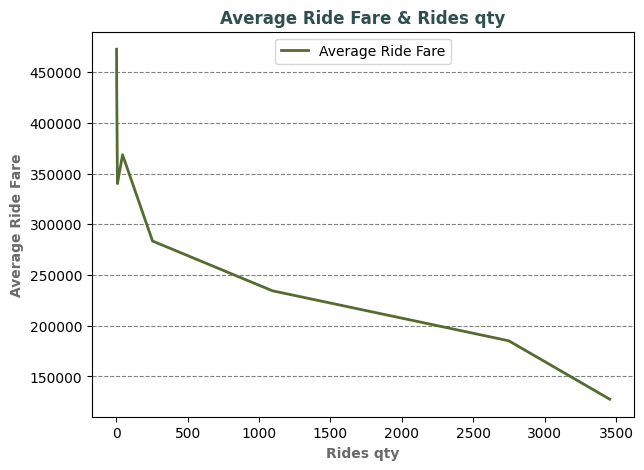

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(data_grouped['Ride'],data_grouped['Average_Ride_Fare'], color = "darkolivegreen", linewidth = 2, label='Average Ride Fare')

ax.set_title('Average Ride Fare & Rides qty', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
ax.set_xlabel("Rides qty", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
ax.set_ylabel("Average Ride Fare", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
ax.legend(prop={'size': 10}, loc = 'upper center')
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

### Driver behavior

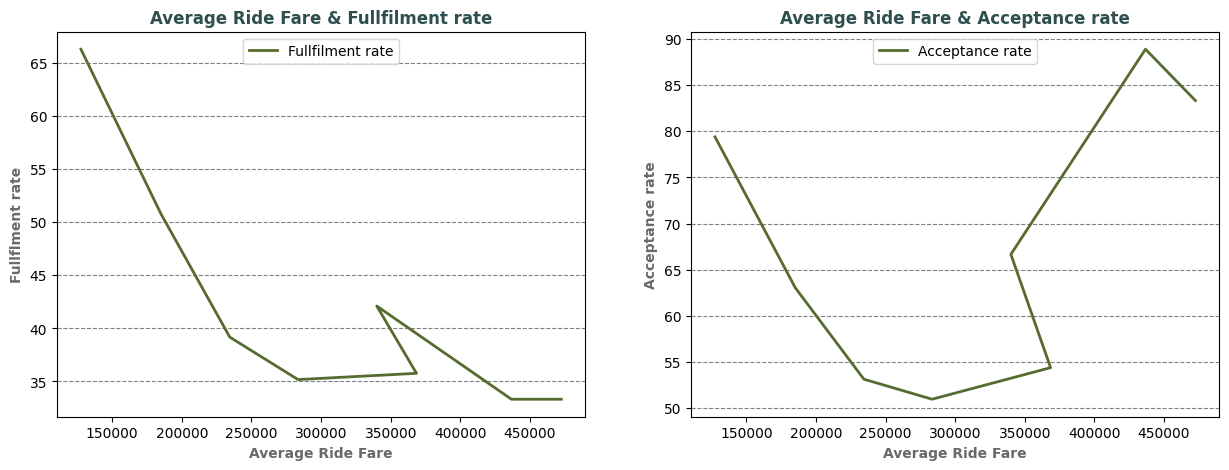

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(data_grouped['Average_Ride_Fare'],data_grouped['Fulfillment_rate'], color = "darkolivegreen", linewidth = 2, label='Fullfilment rate')
axes[1].plot(data_grouped['Average_Ride_Fare'],data_grouped['Acceptance_rate'], color = "darkolivegreen", linewidth = 2, label='Acceptance rate')

axes[0].set_title('Average Ride Fare & Fullfilment rate', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[0].set_xlabel("Average Ride Fare", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0].set_ylabel("Fullflment rate", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[0].legend(prop={'size': 10}, loc = 'upper center')
axes[0].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

axes[1].set_title('Average Ride Fare & Acceptance rate', loc = "Center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'darkslategray'})
axes[1].set_xlabel("Average Ride Fare", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1].set_ylabel("Acceptance rate", fontdict = {'fontsize':10, 'fontweight':'bold', 'color':'dimgray'})
axes[1].legend(prop={'size': 10}, loc = 'upper center')
axes[1].grid(axis = 'y', color = 'gray', linestyle = 'dashed')

Conclusions:

1. The fulfillment rate decreases with increasing price per ride. The higher value is with the lower price (short distance).
2. The acceptance rate has its lower point in the price per ride aprox.28k, with highest values of acceptance rateat the lowest and highest price per ride.

As we can see, price changes affects the fulfillment and acceptance rates.

### Pricing strategy proposal.

Implement dynamic prices:

1. Consider lower prices for large distances in order to increase the fulfillment rate.
2. Consider peak hours during the day to increase ride rates and vice verse in order to incentivize drivers. Consider the holidays for higher rates.